In [48]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## CONFIDENCE INTERVALS

### Exercise 1.

#####  What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees.  Give a 99% confidence interval for the average body temperature of healthy people.

In [49]:
n = 130,
std = 0.73
mean = 98.25

In [50]:
se = std / np.sqrt(n)
se

array([0.06402524])

In [51]:
ci_z = stats.norm.interval(0.99,mean, se)
ci_z

(array([98.08508192]), array([98.41491808]))

### Exercise 2.

##### The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.  Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [52]:
hosp_sample = 500
hosp_mean = 5.4
hosp_std = 3.1

In [53]:
hosp_se = hosp_std / np.sqrt(hosp_sample)

In [54]:
hosp_ci_z = stats.norm.interval(0.95, hosp_mean, hosp_se)
hosp_ci_z

(5.12827801242126, 5.67172198757874)

## HYPOTHESIS TESTING

### Exercise 3.

##### The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)
CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [55]:
import scipy.stats as stats
from math import sqrt

In [56]:
x_bar = 13.2 #sample mean
n = 40 #number of samples
sigma = 2.5 #standard deviation
mu = 12.2 #Population Mean

In [57]:
z = (x_bar - mu) / (sigma / sqrt(n))
z

2.5298221281347035

In [58]:
p_value = 1 - stats.norm.cdf(2.529)
p_value

0.005719401359928433

In [59]:
alpha = 0.01

if p_value < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternatice hypothesis.'.format(alpha) )
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha) )
    

At 0.01 level of significance, we can reject the null hypothesis in favor of alternatice hypothesis.


### Exercise 4.

##### Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [60]:
import pandas as pd
df = pd.read_csv('soil - Sheet1.csv')
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [61]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [62]:
indTest = stats.ttest_ind(df['Soil1'].dropna(), df['Soil2'], equal_var=True)
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [63]:
indTest.statistic

5.1681473319343345

In [64]:
indTest.pvalue

2.59322873235282e-06

In [65]:
# decision :

alpha = 0.01

if indTest.pvalue < alpha:
    print('Reject the null. At the alpha = 0.01, we have sufficient evidence to indicate that soil1 differ from soil 2')
else:
    print('Fail to reject the null')

Reject the null. At the alpha = 0.01, we have sufficient evidence to indicate that soil1 differ from soil 2


### Exercise 5.

#####   The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [66]:
df = pd.read_csv('2015 PISA Test - Sheet1.csv')
df.sample(5)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
62,SWE,EU,90.610200,493.9181,500.1556,493.4224
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
47,MLT,EU,76.184000,478.6448,446.6661,464.7819
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


In [67]:
for i in df.Continent_Code.unique():
    print(i)
    print(df[df["Continent_Code"]==i].describe())
    print(70*"-")


EU
       internet_users_per_100        Math     Reading     Science
count               37.000000   37.000000   37.000000   37.000000
mean                77.274888  477.981449  476.164608  478.299381
std                 12.425773   35.150403   37.720545   34.450616
min                 53.744979  371.311400  351.741500  383.682400
25%                 68.632900  464.040100  452.514300  460.774900
50%                 76.184000  489.728700  487.250100  490.225000
75%                 87.479056  503.722000  499.814600  501.936900
max                 98.200000  521.250600  526.424700  534.193700
----------------------------------------------------------------------
AS
       internet_users_per_100        Math     Reading     Science
count               17.000000   17.000000   17.000000   17.000000
mean                68.455613  466.216647  454.059682  467.945847
std                 21.086060   64.356490   57.048962   56.671371
min                 21.976068  380.259000  346.549000  386.485400

In [68]:
eu_scores = df[df["Continent_Code"]=="EU"]
as_scores = df[df["Continent_Code"]=="AS"]


In [69]:
twosample = stats.ttest_ind(eu_scores.Math, as_scores.Math)
twosample


Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

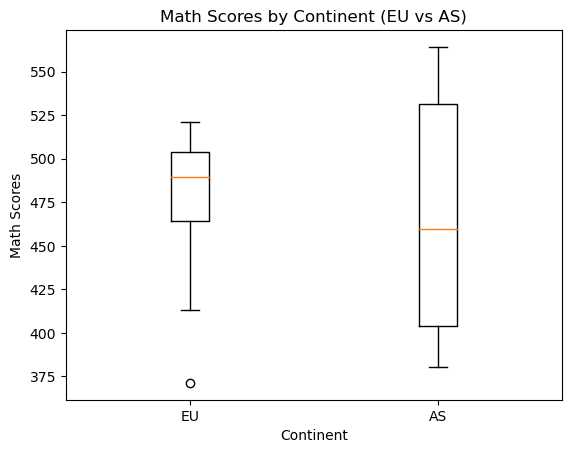

In [70]:
plt.boxplot([eu_scores.Math, as_scores.Math], labels=['EU', 'AS'])
plt.xlabel('Continent')
plt.ylabel('Math Scores')
plt.title('Math Scores by Continent (EU vs AS)')
plt.show()